# Парное выравнивание

# Порядок сдачи домашнего

Вам требуется создать гит репозиторий куда вы будете складывать все ваши домашние. Под каждое домашнее вы создаете отдельную ветку куда вносите все изменения в рамках домашнего. Как только домашнее готово - создаете пулл реквест (обратите внимание что в пулл реквесте должны быть отражены все изменения в рамках домашнего). Ревьювером назначаете http://github.com/michael15346/ .
Перед сдачей проверьте код, напишите тесты. Не забудьте про PEP8, например, с помощью flake8. Задание нужно делать в jupyter notebook.

**Дедлайн - 21 октября 10:00**

# Введение

**Выравнивание последовательностей** — фундаментальный инструмент в биоинформатике, позволяющий сравнивать биологические последовательности (ДНК, РНК, белки) для выявления сходства, которое может указывать на функциональные, структурные или эволюционные связи между ними.

**Парное выравнивание** подразумевает сравнение двух последовательностей для определения наилучшего соответствия между их элементами (нуклеотидами или аминокислотами). Существует два основных типа парного выравнивания:

- **Глобальное выравнивание**: направлено на выравнивание всей длины двух последовательностей, максимально учитывая все элементы.
- **Локальное выравнивание**: нацелено на поиск наилучшего соответствующего участка внутри двух последовательностей.

В данном домашнем задании мы с вами сконцентрируемся на **глобальном выравнивании**.

### Пример парного выравнивания

Рассмотрим две нуклеотидные последовательности:

```
Последовательность 1 (Seq1): A G C T A C G A
Последовательность 2 (Seq2): G C T A G A
```

**Глобальное выравнивание** (учитывает всю длину последовательностей):

```
Seq1: A G C T A C G A
Seq2: - G C T A - G A
```

### Значение выравнивания последовательностей

- **Эволюционные связи**: Сходство между последовательностями может указывать на общих предков.
- **Функциональные домены**: Выравнивание помогает идентифицировать консервативные участки, важные для функции белка или нуклеиновой кислоты.
- **Геномные исследования**: Используется для аннотации генов, предсказания структур и понимания генетических вариаций.

## Алгоритм выравнивания

- Для автоматизации процесса выравнивания используется **Алгоритм Нидлмана-Вунша**. Он предназначен для глобального выравнивания и использует динамическое программирование для нахождения оптимального выравнивания по всей длине последовательностей. 
- Для оценки сходства при выравнивании белковых последовательностей используется матрица **BLOSUM** (Blocks Substitution Matrix). Матрицы BLOSUM создаются на основе статистического анализа реальных белковых множественных выравниваний последовательностей.

### Пример множественного выравнивания (для построения матрицы BLOSUM)

Рассмотрим нуклеотидные последовательности:

```
Последовательность 1 (Seq1): A G C T A C G T G T C G C T G A A T C T A T G A C T
Последовательность 2 (Seq2): G C T A G A G C A A G G C A A C T G C A T C T
Последовательность 3 (Seq3): A C T G C A C C C A T G A A C C T C G C G C T
Последовательность 4 (Seq4): A C T G C A C C C A T G A A C C T C T C G C T
Последовательность 5 (Seq5): A C T G C A C C C A T G A A C C T C T C G C T
Последовательность 6 (Seq6): A C T G C A C C C A T G A A C C T C T C A C T
Последовательность 7 (Seq7): A C T G C A C C C A T G A A C C T C T C A C T
```

**Множественное выравнивание**:

```
Seq1: A G C T A C G T G T C G C T G A A T C T A T G A C T
Seq2: - G C T A - G A G C A - A G G C A A C T G C A T C T
Seq3: A - C T G - C A C C C - A T G A A C C T C G C G C T
Seq4: A - C T G - C A C C C - A T G A A C C T C T C G C T
Seq5: A - C T G - C A C C C - A T G A A C C T C T C G C T
Seq6: A - C T G - C A C C C - A T G A A C C T C T C A C T
Seq7: A - C T G - C A C C C - A T G A A C C T C T C A C T
```

Перед тем как приступать к реализации парного выравнивания давайте научимся считать матрицу BLOSUM.

# Матрица BLOSUM

## Подсчет частот пар нуклеотидов

### Шаг 1.1: Генерация пар нуклеотидов

Напишите функцию `generate_pairs(alignments)`, которая проходит по всем позициям выравнивания (одного столбца) и генерирует все возможные пары нуклеотидов в этой позиции.

**Пример**:

Рассмотрим на примере множественного выравнивания выше:

```
generate_pairs(["A", "A", "G"])
[('A', 'A'), ('A', 'G'), ('A', 'G')]

generate_pairs(["T", "T", "T"])
[('T', 'T'), ('T', 'T'), ('T', 'T')]

generate_pairs(["G", "G", "-"])
[('G', 'G'), ('G', '-'), ('G', '-')]

len(generate_pairs(['A', 'T', 'G', 'G', 'G', 'A', 'A']))
21
```

In [1]:
alignments = ["AGCTACGTGTCGCTGAATCTATGACT", 
              "-GCTA-GAGCA-AGGCAACTGCATCT", 
              "A-CTG-CACCC-ATGAACCTCGCGCT",
              "A-CTG-CACCC-ATGAACCTCTCGCT",
              "A-CTG-CACCC-ATGAACCTCTCGCT",
              "A-CTG-CACCC-ATGAACCTCTCACT",
              "A-CTG-CACCC-ATGAACCTCTCACT"
             ]

In [2]:
def generate_pairs(alignments):
    result = []
    size = max([len(alignments[i]) for i in range(len(alignments))])
    cols = []
    for i in range(len(alignments)):
        alignments[i] = '-' * (size - len(alignments[i])) + alignments[i]
    for i in range(len(alignments[0])):
        cols.append([row[i] for row in alignments])
    for col in cols:
        for i in range(len(col)):
            for j in range(i + 1, len(col)):
                result.append((col[i], col[j]))
    return result

### Шаг 1.2: Подсчет частот пар

Используйте полученные пары для подсчета частоты каждой пары нуклеотидов. Создайте словарь `pair_counts`, где ключом является кортеж из двух нуклеотидов, а значением — количество их совместных появлений. Пропуски в выравнивании нужно пропускать (если один из символ в выравнивании `'-'`)

**Подсказка**: Учитывайте, что матрица симметрична, поэтому пары `('A','G')` и `('G','A')` должны считаться одинаковыми.

**Пример**:

```
pair_counts = count_pairs(alignments)
pair_counts
{('A', 'A'): 85, ('G', 'G'): 37, ('C', 'C'): 143, ('T', 'T'): 88, ('A', 'G'): 21, 
 ('C', 'G'): 31, ('A', 'T'): 10, ('C', 'T'): 16, ('A', 'C'): 33, ('G', 'T'): 14}
```

In [3]:
def count_pairs(alignments):
    pairs = generate_pairs(alignments)
    result = {}
    for (nucl1, nucl2) in pairs:
        if nucl1 == '-' or nucl2 == '-':
            continue
        if (nucl1, nucl2) in result:
            result[(nucl1, nucl2)] += 1
        elif (nucl2, nucl1) in result:
            result[(nucl2, nucl1)] += 1
        else:
            result[(nucl1, nucl2)] = 1
    return result

In [4]:
print(count_pairs(alignments))

{('A', 'A'): 85, ('G', 'G'): 37, ('C', 'C'): 143, ('T', 'T'): 88, ('A', 'G'): 21, ('G', 'C'): 31, ('T', 'A'): 10, ('T', 'C'): 16, ('C', 'A'): 33, ('T', 'G'): 14}


## Вычисление ожидаемых частот

Реализуйте функцию `calculate_frequencies`, которая будет вычислять частоту нуклеотида по множественному выравниванию

**Пример**:

```
freqs = calculate_frequencies(alignments)
print("Частоты:")
for x, freq in freqs.items():
    print(f"{x}: {freq:.4f}")
    
Частоты:
A: 0.2439
G: 0.1585
C: 0.3780
T: 0.2195
```

In [5]:
def calculate_frequencies(alignments):
    result = {}
    nucleotids = ['A', 'G', 'C', 'T']
    length = sum(sum(row.count(nucl) for row in alignments) for nucl in nucleotids)
    for nucl in nucleotids:
        result[nucl] = sum(row.count(nucl) for row in alignments) / length
    return result 

In [6]:
freqs = calculate_frequencies(alignments)
print("Частоты:")
for x, freq in freqs.items():
    print(f"{x}: {freq:.4f}")

Частоты:
A: 0.2439
G: 0.1585
C: 0.3780
T: 0.2195


##  Расчет логарифмических коэффициентов

- Для каждой пары нуклеотидов `(x, y)` вычислите логарифмический коэффициент замены по формуле:


$$S(x, y) = scale * \log_2 \left( \frac{observed\_freq[x, y]}{expected\_freq[x, y]} \right)$$

- Здесь `observed_freq` — наблюдаемая частота пары из `pair_counts` деленное на общее количество пар, а `expected_freq` — ожидаемая частота, которую можно вычислить как `expected_freq[x, y] = freqs[x] * freqs[y]`

- Для удобства представления округлите значения `S(x, y)` до целых чисел, умножив на масштабный фактор (например, 3).

**Пример:**

```python
scores = calculate_scores(pair_counts, freqs)
scores
{('A', 'A'): 5, ('G', 'G'): 5, ('C', 'C'): 3, ('T', 'T'): 6, ('A', 'G'): 1,
 ('C', 'G'): 0, ('A', 'T'): -4, ('C', 'T'): -4, ('A', 'C'): -1, ('G', 'T'): -1}
```


In [7]:
from math import log2
def calculate_scores(pair_counts, freqs, scale=3):
    result = {}
    sum_of_pairs = sum(value for key, value in pair_counts.items()) 
    for key, value in pair_counts.items():
        log_coef = log2((value / sum_of_pairs) / (freqs[key[0]] * freqs[key[1]]))
        result[key] = round(scale * log_coef) 
    return result

In [8]:
scores = calculate_scores(count_pairs(alignments), calculate_frequencies(alignments))
print(scores)

{('A', 'A'): 5, ('G', 'G'): 5, ('C', 'C'): 3, ('T', 'T'): 6, ('A', 'G'): 1, ('G', 'C'): 0, ('T', 'A'): -4, ('T', 'C'): -4, ('C', 'A'): -1, ('T', 'G'): -1}



## Составление матрицы BLOSUM

### Шаг 4.1: Заполнение матрицы

- Реализуйте функцию `create_blosum_matrix`, для создания BLOSUM матрицы.
- Используйте рассчитанные ранее логарифмические коэффициенты `scores` для заполнения матрицы.
- Учитывайте, что матрица симметрична: `S(x, y) = S(y, x)`.

**Пример:**

```python
blosum_matrix = create_blosum_matrix(scores, nucleotides)
blosum_matrix
{'A': {'A': 5, 'G': 1, 'C': -1, 'T': -4},
 'G': {'A': 1, 'G': 5, 'C': 0, 'T': -1},
 'C': {'A': -1, 'G': 0, 'C': 3, 'T': -4},
 'T': {'A': -4, 'G': -1, 'C': -4, 'T': 6}}
```


In [9]:
def create_blosum_matrix(scores, nucleotides):
    result = {}
    for nucl in nucleotides:
        result[nucl] = {}
    for nucl1 in nucleotides:
        for nucl2 in nucleotides:
            if ((nucl1, nucl2) in scores.keys()):
                result[nucl1][nucl2] = scores[(nucl1, nucl2)]
                result[nucl2][nucl1] = scores[(nucl1, nucl2)]
            elif ((nucl2, nucl1) in scores.keys()):
                result[nucl1][nucl2] = scores[(nucl2, nucl1)]
                result[nucl2][nucl1] = scores[(nucl2, nucl1)]
            else:
                result[nucl1][nucl2] = 0
                result[nucl2][nucl1] = 0
    return result

In [10]:
blosum_matrix = create_blosum_matrix(scores, ['A', 'G', 'C', 'T'])
print(blosum_matrix)

{'A': {'A': 5, 'G': 1, 'C': -1, 'T': -4}, 'G': {'A': 1, 'G': 5, 'C': 0, 'T': -1}, 'C': {'A': -1, 'G': 0, 'C': 3, 'T': -4}, 'T': {'A': -4, 'G': -1, 'C': -4, 'T': 6}}


### Шаг 4.2: Вывод матрицы

- Выведите матрицу BLOSUM в удобочитаемом формате, например, как таблицу с заголовками.

**Пример:**

```python
print_blosum_matrix(blosum_matrix, nucleotides)
    A   G   C   T
A   5   1  -1  -4
G   1   5   0  -1
C  -1   0   3  -4
T  -4  -1  -4   6
```

In [11]:
def print_blosum_matrix(matrix, nucleotides):
    print('  ', end='')
    for nucl in nucleotides:
        print(nucl, end=' ')
    print()

    for nucl1 in nucleotides:
        print(nucl1, end=' ')
        for nucl2 in nucleotides:
            print(matrix[nucl1][nucl2], end=' ')
        print()

In [12]:
print_blosum_matrix(blosum_matrix, ['A', 'G', 'C', 'T'])

  A G C T 
A 5 1 -1 -4 
G 1 5 0 -1 
C -1 0 3 -4 
T -4 -1 -4 6 


## Визуализация результатов

Запустите код для визуализации результатов. Здесь вам понадобится установить библиотеки. Для этого в консоли выполните:
```
pip install numpy
pip install seaborn
pip install matplotlib
```

/home/alexander/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


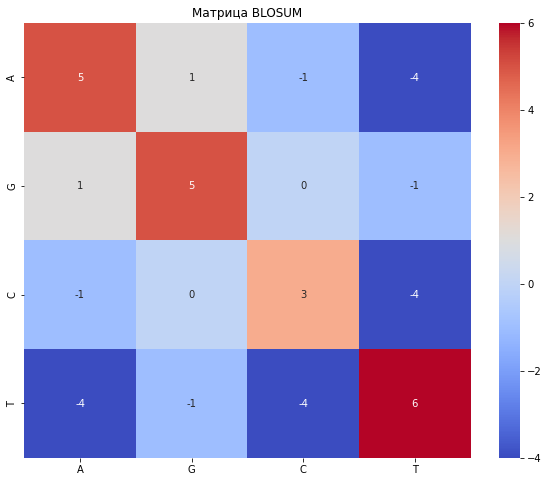

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_blosum_matrix(matrix, nucleotides):
    data = np.array([[matrix[x][y] for y in nucleotides] for x in nucleotides])
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, xticklabels=nucleotides, yticklabels=nucleotides, annot=True, cmap="coolwarm")
    plt.title("Матрица BLOSUM")
    plt.show()

# Пример использования
visualize_blosum_matrix(blosum_matrix, ['A', 'G', 'C', 'T'])

# Реализация алгоритма Нидлмана-Вунша

### Шаг 5: Инициализация матрицы динамического программирования

Теперь перейдём к реализации алгоритма [Нидлмана-Вунша](https://en.wikipedia.org/wiki/Needleman%E2%80%93Wunsch_algorithm).

Реализуйте функцию `init`, которая по $m, n$ и ошибке $\sigma$ строит матрицу c $m + 1$ строкой и $n + 1$ столбцом:

$$A_{m,n} = \begin{pmatrix} 0 & -\sigma & \cdots & -n \sigma \\ -\sigma & 0 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ -m\sigma & 0 & \cdots & 0 \end{pmatrix} $$

**Пример:**

```python
print(init(3, 3, 4))
[[0, -4, -8, -12], [-4, 0, 0, 0], [-8, 0, 0, 0], [-12, 0, 0, 0]]
```

In [14]:
def init(rows, cols, gap_penalty=10):
    result = []
    for i in range(rows + 1):
        if (i == 0):
            result.append([-gap_penalty * j for j in range(cols + 1)])
        else:
            result.append([0] * (cols + 1)) 
            result[i][0] = -gap_penalty * i
    return result

In [15]:
print(init(3, 3, 4))

[[0, -4, -8, -12], [-4, 0, 0, 0], [-8, 0, 0, 0], [-12, 0, 0, 0]]


### Шаг 6: Заполнение матрицы динамического программирования

Пусть `a` и `b` - две последовательности, которые хотим выравнять. Теперь имея пустую матрицу, нужно научиться её заполнять. Для этого вспомним, как вычисляется очередной элемент матрицы:

$$A_{i \ j} = max \begin{cases} A_{i-1 \ j-1} + s(a_{i},b_{j}) & \ \text{Match / Mismatch}\\ A_{i \ j-1} - \sigma & \ \text{Insertion} \\ A_{i-1\ j} - \sigma & \ \text{Deletion} \end{cases}$$

где $s(a_{i},b_{j})$ - значение матрицы BLOSUM для нуклеотидов $a_{i}$ и $b_{j}$, $\sigma$ - штраф за пропуск символа в выравнивании (параметр)

### Шаг 7: Вычисление значения матрицы

Реализуйте функцию `get_new_score`, которая принимает на вход 5 параметров - `up` ($A_{i-1\ j}$), `left` ($A_{i \ j-1}$), `middle` ($A_{i-1 \ j-1}$), `s_score` ($s(a_{i},b_{j})$), `gap_penalty` ($\sigma$), и вычисляет значение для матрицы $A_{i\ j}$

**Пример:**

```python
print(get_new_score(0, 10, 2, 0, 2))
8
print(get_new_score(-16, -7, -14, 0, 2))
-9
```

In [16]:
def get_new_score(up, left, middle, s_score, gap_penalty):
    return max(middle + s_score, left - gap_penalty, up - gap_penalty)

In [17]:
print(get_new_score(0, 10, 2, 0, 2))
print(get_new_score(-16, -7, -14, 0, 2))

8
-9


### Шаг 8 Заполнение матрицы

Реализуйте функцию `align`,  которая на вход принимает две последовательности ДНК, штраф за пропуск ($\sigma$), матрицу BLOSUM и возвращает заполненную матрицу `A`.

**Пример:**

```python
top_seq = "AGTACGCA"
bottom_seq = "TATGC"
gap_penalty = 2

print(align(top_seq, bottom_seq, gap_penalty, blosum_matrix))
[[0, -2, -4, -6, -8, -10, -12, -14, -16],
 [-2, -4, -3, 2, 0, -2, -4, -6, -8],
 [-4, 3, 1, 0, 7, 5, 3, 1, -1],
 [-6, 1, 2, 7, 5, 3, 4, 2, 0],
 [-8, -1, 6, 5, 8, 6, 8, 6, 4],
 [-10, -3, 4, 3, 6, 11, 9, 11, 9]]
```

In [18]:
top_seq = "AGTACGCA"
bottom_seq = "TATGC"
gap_penalty = 2

In [19]:
def align(top_seq, bottom_seq, gap_penalty, blosum_matrix):
    result = init(len(bottom_seq), len(top_seq), gap_penalty)
    for i in range(1, len(bottom_seq) + 1):
        for j in range(1, len(top_seq) + 1):
            result[i][j] = get_new_score(result[i-1][j], result[i][j-1], result[i-1][j-1], blosum_matrix[bottom_seq[i-1]][top_seq[j-1]], gap_penalty)
    return result


In [20]:
assert align(top_seq, bottom_seq, gap_penalty, blosum_matrix) == [[0, -2, -4, -6, -8, -10, -12, -14, -16],
 [-2, -4, -3, 2, 0, -2, -4, -6, -8],
 [-4, 3, 1, 0, 7, 5, 3, 1, -1],
 [-6, 1, 2, 7, 5, 3, 4, 2, 0],
 [-8, -1, 6, 5, 8, 6, 8, 6, 4],
 [-10, -3, 4, 3, 6, 11, 9, 11, 9]], 'failed test 1'

In [21]:
print_blosum_matrix(blosum_matrix, ['A', 'G', 'T', 'C'])

  A G T C 
A 5 1 -4 -1 
G 1 5 -1 0 
T -4 -1 6 -4 
C -1 0 -4 3 


### Шаг 9: Построение выравнивания

Теперь имея матрицу выравнивания построим самое выравнивание.

Реализуйте функцию get_alignment, которая по двум последовательностям, матрице выравнивания, штрафа за пропуски, бонусам за совпадение/несовпадение нуклеотидов строит выравнивание.

**Пример:**

```python

top_seq = "AGTACGCA"
bottom_seq = "TATGC"
gap_penalty = 2
sm = align(top_seq, bottom_seq, gap_penalty, blosum_matrix)
aligns = get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix)
print(aligns[0])
print(aligns[1])
TA-T--GC-
-AGTACGCA

top_seq = "AGTCTCCCCC"
bottom_seq = "ACTTCTACCCCAGC"
sm = align(top_seq, bottom_seq, gap_penalty, blosum_matrix)
aligns = get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix)
print(aligns[0])
print(aligns[1])
ACTTCTACCCCAGC
AGT-CT-CCCC--C
```

In [22]:
def get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix):
    i, j = len(bottom_seq), len(top_seq)
    align1, align2 = "", ""
    
    while i > 0 or j > 0:
        if i > 0 and j > 0 and sm[i][j] == sm[i-1][j-1] + blosum_matrix[bottom_seq[i-1]][top_seq[j-1]]:
            align1 = bottom_seq[i-1] + align1
            align2 = top_seq[j-1] + align2
            i -= 1
            j -= 1
        elif i > 0 and sm[i][j] == sm[i-1][j] - gap_penalty:
            align1 = bottom_seq[i-1] + align1
            align2 = '-' + align2
            i -= 1
        else:
            align1 = '-' + align1
            align2 = top_seq[j-1] + align2
            j -= 1
    
    return [align1, align2]


In [23]:
top_seq = "AGTACGCA"
bottom_seq = "TATGC"
gap_penalty = 2
sm = align(top_seq, bottom_seq, gap_penalty, blosum_matrix)
aligns = get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix)
print(aligns[0])
print(aligns[1])

top_seq = "AGTCTCCCCC"
bottom_seq = "ACTTCTACCCCAGC"
sm = align(top_seq, bottom_seq, gap_penalty, blosum_matrix)
aligns = get_alignment(top_seq, bottom_seq, sm, gap_penalty, blosum_matrix)
print(aligns[0])
print(aligns[1])

--TATGC-
AGTACGCA
ACTTCTACCCCAGC
AG-TCT-CCCC--C


## Поздравляю! Мы научились выравнивать ДНК!